<a href="https://colab.research.google.com/github/ducnguyen1704/ThaoTacDuLieu/blob/master/B%C3%A0i_T%E1%BA%ADp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Bài tập] Phân tích dữ liệu Online Retail

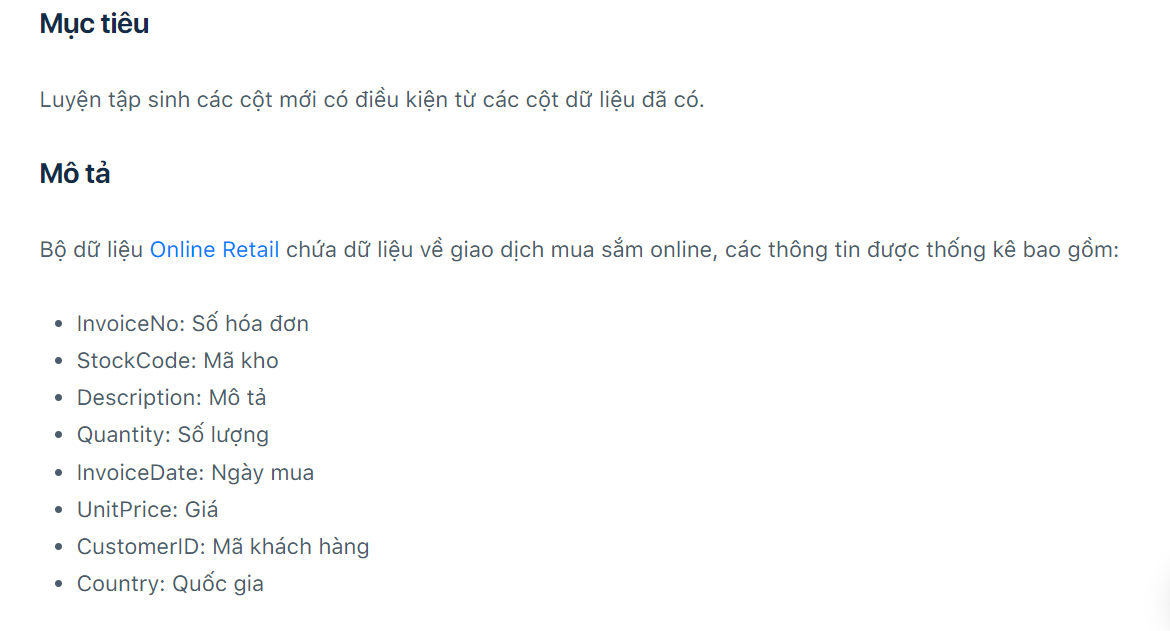

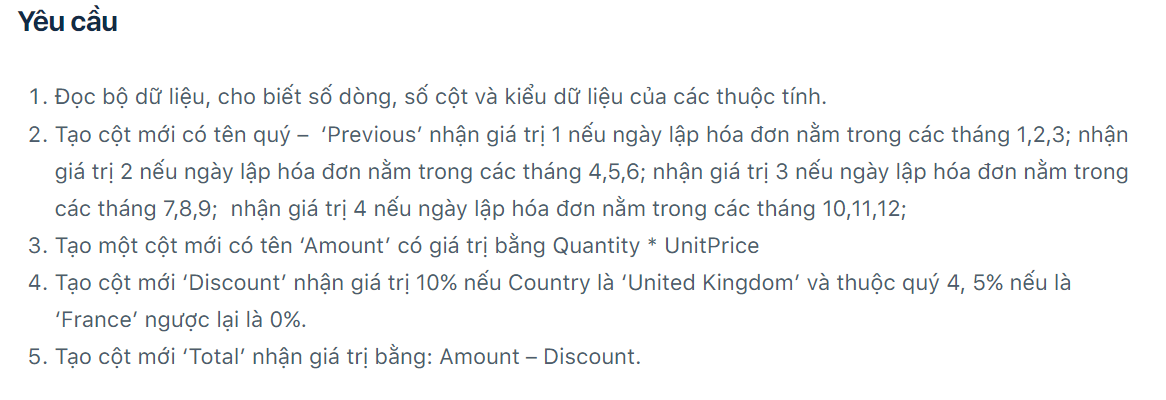

1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- Bộ dữ liệu gồm có 8 cột và 541908 dòng

2. Tạo cột mới có tên quý –  ‘Previous’ nhận giá trị 1 nếu ngày lập hóa đơn nằm trong các tháng 1,2,3; nhận giá trị 2 nếu ngày lập hóa đơn nằm trong các tháng 4,5,6; nhận giá trị 3 nếu ngày lập hóa đơn nằm trong các tháng 7,8,9;  nhận giá trị 4 nếu ngày lập hóa đơn nằm trong các tháng 10,11,12;

In [10]:
data['Day']=pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.day
data['Month']=pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.month
data['Year']=pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.year
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,9,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,9,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011


In [14]:
df = data

In [16]:
conditions = [(df['Month']==1) | (df['Month']==2) | (df['Month']==3),
             (df['Month']==4) | (df['Month']==5) | (df['Month']==6),
             (df['Month']==7) | (df['Month']==8) | (df['Month']==9),
             (df['Month']==10) | (df['Month']==11) | (df['Month']==12)]
choices = ['1','2','3','4']
df['Quý'] = np.select(conditions, choices)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Quý
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010,4
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,9,12,2011,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,9,12,2011,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011,4


In [18]:
df.iloc[1243:1249]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Quý
1243,536532,22553,PLASTERS IN TIN SKULLS,24,12/1/2010 13:24,1.65,12433.0,Norway,1,12,2010,4
1244,536532,22551,PLASTERS IN TIN SPACEBOY,24,12/1/2010 13:24,1.65,12433.0,Norway,1,12,2010,4
1245,536532,22547,MINI JIGSAW DINOSAUR,24,12/1/2010 13:24,0.42,12433.0,Norway,1,12,2010,4
1246,536532,22544,MINI JIGSAW SPACEBOY,24,12/1/2010 13:24,0.42,12433.0,Norway,1,12,2010,4
1247,536532,22543,MINI JIGSAW BAKE A CAKE,24,12/1/2010 13:24,0.42,12433.0,Norway,1,12,2010,4
1248,536532,22540,MINI JIGSAW CIRCUS PARADE,24,12/1/2010 13:24,0.42,12433.0,Norway,1,12,2010,4


3. Tạo một cột mới có tên ‘Amount’ có giá trị bằng Quantity * UnitPrice

In [20]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Quý,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,9,12,2011,4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,9,12,2011,4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011,4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011,4,16.60


4. Tạo cột mới ‘Discount’ nhận giá trị 10% nếu Country là ‘United Kingdom’ và thuộc quý 4, 5% nếu là ‘France’ ngược lại là 0%.

In [21]:
conditions = [(df['Country']=='United Kingdom') & (df['Quý'] == 4),
              (df['Country']=='France')]
options = ['10%','5%']
df['Discount'] = np.select(conditions, options, default = '0%')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Quý,Amount,Discount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010,4,15.30,0%
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4,20.34,0%
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010,4,22.00,0%
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4,20.34,0%
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,4,20.34,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,9,12,2011,4,10.20,5%
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,9,12,2011,4,12.60,5%
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011,4,16.60,5%
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,9,12,2011,4,16.60,5%


5. Tạo cột mới ‘Total’ nhận giá trị bằng: Amount – Discount.

In [22]:
df['Total'] = df['Amount'] - df['Discount']
df

TypeError: ignored